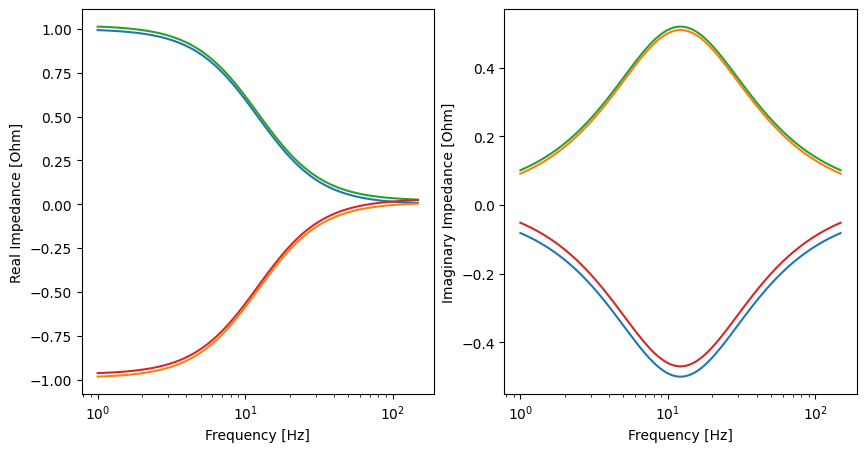

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def RC_circuit(f,R,f0):
    return R / (1 + 1j*f/f0)

def RnC_circuit(f,R,f0):
    return R / (1 - 1j*f/f0)

def RL_circuit(f,R,f0):
    return 1j*f/f0*R / (1 + 1j*f/f0)


f = np.exp(np.linspace(0,5,num=100))

fig, axs = plt.subplots(1,2,figsize=(10,5))

axs[0].set_xscale('log')
axs[0].set_xlabel('Frequency [Hz]')
axs[0].set_ylabel('Real Impedance [Ohm]')

axs[1].set_xscale('log')
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylabel('Imaginary Impedance [Ohm]')


Z_RC = RC_circuit(f,1,np.exp(2.5))

axs[0].plot(f,Z_RC.real)
axs[1].plot(f,Z_RC.imag)

Z_nRnC = RC_circuit(f,-1,np.exp(2.5))

axs[0].plot(f,Z_nRnC.real+0.01)
axs[1].plot(f,Z_nRnC.imag+0.01)

Z_RnC = RC_circuit(f,1,-np.exp(2.5))

axs[0].plot(f,Z_RnC.real+0.02)
axs[1].plot(f,Z_RnC.imag+0.02)

Z_nRC = RC_circuit(f,-1,-np.exp(2.5))

axs[0].plot(f,Z_nRC.real+0.03)
axs[1].plot(f,Z_nRC.imag+0.03)

